## Convert to B&W with Straight Lines


## Extract B&W to array


In [40]:
# check whatsapp for rgb to B&W code

In [41]:
import cv2
import numpy as np

# input is black and white image
image= cv2.imread('res2.png')
black_and_white_image_array= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

x = Image.fromarray(black_and_white_image_array.astype(np.uint8))



In [42]:
black_and_white_image_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Extract Nodes/Dots

In [43]:
import cv2
import numpy as np


image= cv2.imread('res2.png')
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


gray= np.float32(gray)

harris_corners= cv2.cornerHarris(gray, 2, 1, 0.05)

kernel= np.ones((1,1), np.uint8)

harris_corners= cv2.dilate(harris_corners, kernel, iterations= 2)


image[harris_corners > 0.025 * harris_corners.max()]= [255,127,127]

max=harris_corners.max()
x=[]
for i in range(0,harris_corners.shape[0]):
    temp=[]
    for j in range(0,harris_corners.shape[1]):
        if(harris_corners[i][j] > (0.025 * max)):
            temp.append(255)
        else:
            temp.append(0)
    x.append(temp)
    
dots_image_array = np.array(x)



## Extract Outlines

In [44]:
import cv2
import numpy as np

# input is black and white image
image= cv2.imread('res2.png')
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

import matplotlib.pyplot as plt
canny_outline_image_array = cv2.Canny(gray,100,200)

from PIL import Image

# array_image = np.array(x)
canny_outline_image = Image.fromarray(canny_outline_image_array.astype(np.uint8))
# canny_outline_image.save('xyz.png')


In [45]:
canny_outline_image_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [46]:
canny_outline_image_array.shape

(898, 1614)

In [47]:
black_and_white_image_array.shape

(898, 1614)

In [48]:
x=[]
for i in range(0,black_and_white_image_array.shape[0]):
    temp=[]
    for j in range(0,black_and_white_image_array.shape[1]):
        if(canny_outline_image_array[i][j]==255):
            temp.append(255)
        elif(black_and_white_image_array[i][j]==255):
            temp.append(100)
        else:
            temp.append(0)
    x.append(temp)

In [49]:
image_array = np.array(x)
image = Image.fromarray(image_array.astype(np.uint8))
image.save('final.png')


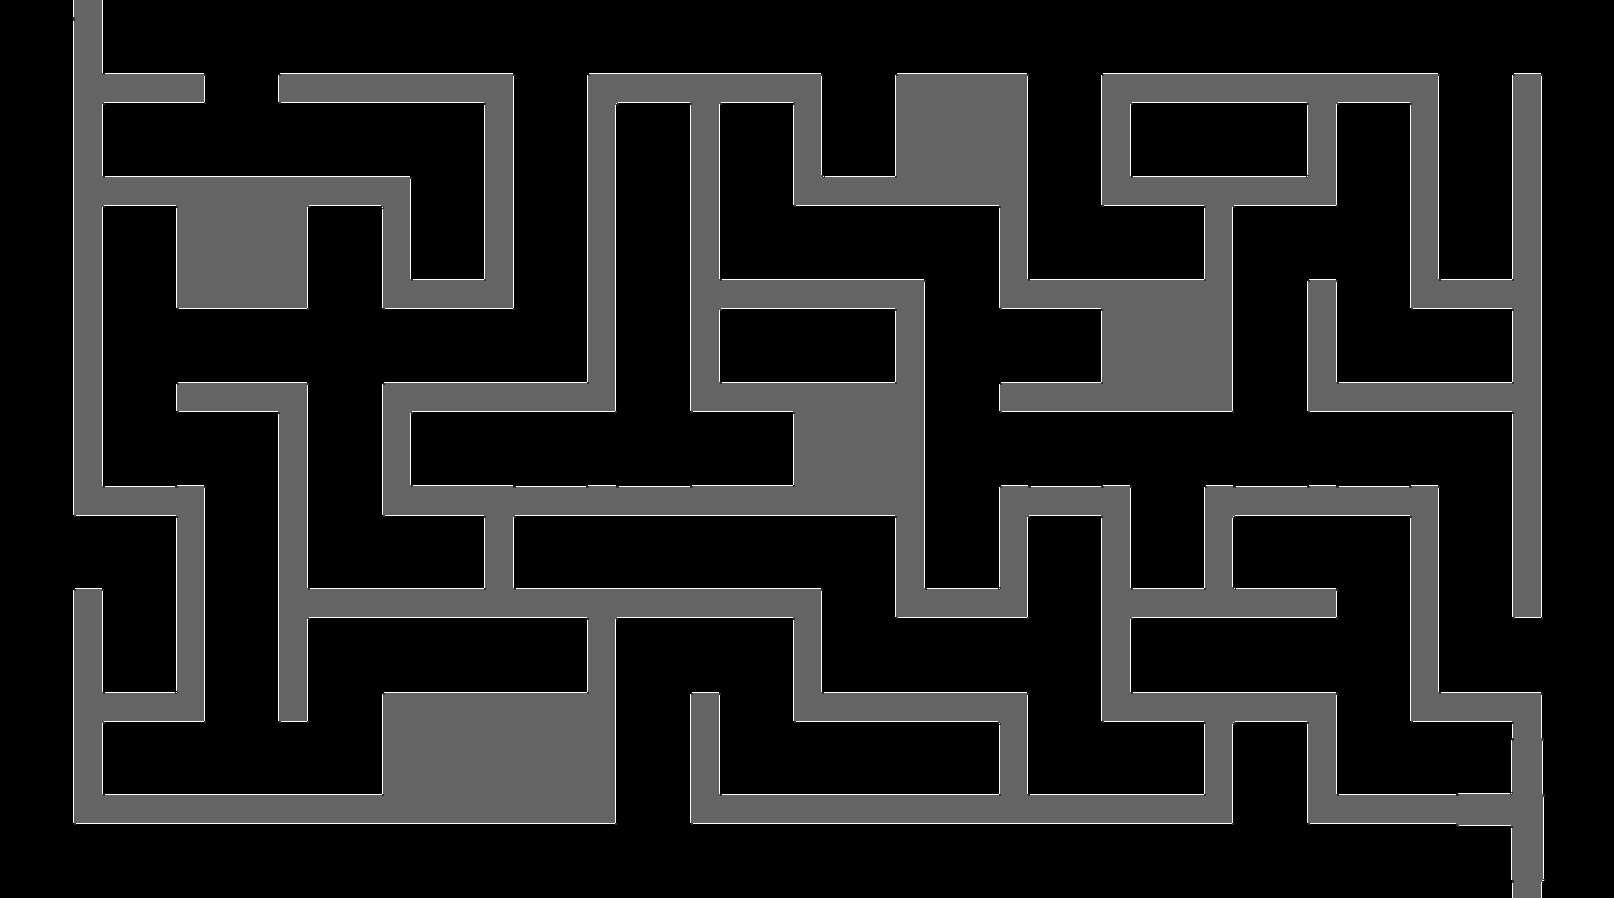

In [56]:
image

# Straight Lines

In [ ]:
new_img_array=image_array

In [ ]:
# go horizontal
for i in range(0,image_array.shape[0]):
    for j in range(0,image_array.shape[1]):
        if(image_array[i][j]==100 and image_array[i-1][j]==255 and image_array[i][j+1]==255):
            new_img_array[i][j]=255
        elif(image_array[i][j]==100 and image_array[i-1][j]==255 and image_array[i][j+1]==100):
            new_img_array[i][j]=255
            new_img_array[i-1][j]=0
        elif(image_array[])

# Add Nodes to final.png

In [55]:
for i in range(0,image_array.shape[0]):
    for j in range(0,image_array.shape[1]):
        if(dots_image_array[i][j]==255 and image_array[i][j]==255):
            image_array[i][j]=50
            
image = Image.fromarray(image_array.astype(np.uint8))
image.save('final_with_nodes.png')


In [50]:
image_array.shape

(898, 1614)

In [51]:
from src.maze import MazeGraph
# Create a new graph
graph = MazeGraph()

# Go Horizontal

In [52]:
def get_length(node1,node2):
    return 0

In [53]:
# iterate through column
for i in range(0,image_array.shape[1]):
    # node_list
    node_list=[]
    
    # iterate through row
    flag_check_if_white_straight_line=0
    for j in range(0,image_array.shape[0]):
        # check if white/border
        if(image_array[j][i]==255):
            
            if(flag_check_if_white_straight_line==1):
                continue
            
            if(len(node_list)==0):
                # create node
                node_list.append(graph.add_node((j,i)))
                if(image_array[j][i]):
                    flag_check_if_white_straight_line=1
            
            # we have to connect an edge
            else:
                node_list.append(graph.add_node((j,i)))
                graph.add_edge(node_list[0],node_list[1],length=get_length(node_list[0],node_list[1]))
                node_list.pop(0)                    
                
                
        elif(image_array[j][i]==100):
            if(flag_check_if_white_straight_line==1):
                flag_check_if_white_straight_line=0
                node_list.append(graph.add_node((j-1,i)))
                graph.add_edge(node_list[0],node_list[1],length=get_length(node_list[0],node_list[1]))
                node_list.pop(0)                    
        
        if(image_array[j][i]==0):
            node_list=[]
            flag_check_if_white_straight_line=0

            
                
            
        

TypeError: object of type 'int' has no len()